<a href="https://colab.research.google.com/github/CunhaWL/LogPromam/blob/master/Prog1LC2_Proj_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **UFRPE - Licrenciatura em Computação**
Programação 1 (LC2)
Projeto de Algoritmo Genético-Wellington Cunha.

### Algoritmo Genético Básico


13.0  Este é melhor Individuo (melhor solução) 
71.00835184133206 Aptidão


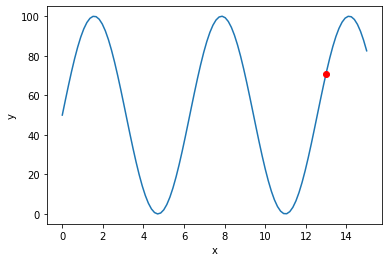

In [25]:
# AG-Ver7.0
import numpy as np
import random as rd
import matplotlib.pyplot as plt

tamCromossomo = 4
pc = 0.95  # padrão
pm = 0.1  # padrão
numgeracoes = 100
tamPopulacao = 10

# População Inicial - Gerada de forma aleatória:
p = np.zeros((tamPopulacao, tamCromossomo))  # o numpy cria uma matriz com zeros, as linhas são tamPopulação e
# as colunas são tamCromossomos
# print (p)
for i in range(tamPopulacao):  # pecorrer as linhas da matriz
    for j in range(tamCromossomo):  # pecorre as coluna da matriz
        a = rd.uniform(0, 1)  # sortear um numero entre o e 1
        if (a >= 0.5):  # condição de a
            p[i][j] = 1  # define 1 para o gene (i-ésimo, j-ésimo)
        else:
            p[i][j] = 0  # define 0 para o gene
# print(p)
# Variaveis do AG
ind = np.zeros(tamCromossomo)  # temporaria - recebe os genes
individuo = np.zeros(tamPopulacao)  # armazena o valor convertido do binario
Aptidao = np.zeros(tamPopulacao)  # armazena aptidoes de todos os individuos
novageracao = np.zeros((tamPopulacao, tamCromossomo))
geracoes = 0
# Iniciando o AG
while (geracoes < numgeracoes):  
    novosindividuos = 0   
    while novosindividuos < (tamPopulacao - 1):
        # O indice começa em Zero
        # Conversão dos individuos para função seno
        for i in range(tamPopulacao):
            ind[:] = p[i, :]  # ind recebe todos os genes
            conv = 0
            for j in range(tamCromossomo):
                conv = conv + ind[j] * (2 ** (tamCromossomo - (j + 1)))
            individuo[i] = conv  #Conversão de base 2 para base 10
        TotalAptidao = 0
        for i in range(tamPopulacao):
            Aptidao[i] = abs((np.sin(individuo[i]) + 1) * 50)
            # função seno
            TotalAptidao = Aptidao[i] + TotalAptidao

        # Seleção dos pais para cruzamento (Metodo Roleta)
        # verificar probabilidade de cada individuo
        # print (TotalAptidao)
        pic = np.zeros(tamPopulacao)
        pitotal = np.zeros(tamPopulacao)
        pic = (1 / TotalAptidao) * Aptidao
        # print (pic)

        # Criando a Roleta
        for i in range(tamPopulacao):
            if (i == 0):
                pitotal[i] = pic[i]
            else:
                pitotal[i] = pic[i] + pitotal[i - 1]
        # print (pitotal)

        # Fazendo os sorteios dos pais de acordo
        # com a probabilidade.
        roleta1 = rd.uniform(0, 1)  # para o pai1
        i = 0
        while (roleta1 > pitotal[i]):
            i += 1
        pai1 = i

        roleta2 = rd.uniform(0, 1)  # para o pai2
        i = 0
        while (roleta2 > pitotal[i]):
            i += 1
        pai2 = i

        while (pai2 == pai1):  # pra nao sortear igual
            roleta2 = rd.uniform(0, 1)
            i = 0
            while (roleta2 > pitotal[i]):
                i += 1
            pai2 = i

        # Seção de Cruzamento
        if (pc > rd.uniform(0, 1)):  # pc é a probabilidade de cruzamento
            c = round(1 + (tamCromossomo - 2) * rd.uniform(0, 1))  # O ponto de corte no Cromossomo
            gene11 = p[pai1][0:c]  # p é da população original
            gene12 = p[pai1][c:tamCromossomo]
            gene21 = p[pai2][0:c]
            gene22 = p[pai2][c:tamCromossomo]
            filho1 = np.concatenate((gene11, gene22), axis=None)
            filho2 = np.concatenate((gene21, gene12), axis=None)

            novageracao[novosindividuos, :] = filho1  
            novosindividuos = novosindividuos + 1
            novageracao[novosindividuos, :] = filho2
            novosindividuos = novosindividuos + 1
            # print(novageracao)

        #
        # Seção de Mutação
        if (pm > rd.uniform(0, 1)):  # pm probabilidade de mutação
            d = round(1 + (tamCromossomo - 2) * rd.uniform(0, 1))

            if (novageracao[novosindividuos - 2][d] == 0):
                novageracao[novosindividuos - 2][d] = 1
            else:
                novageracao[novosindividuos - 2][d] = 0
            if (novageracao[novosindividuos - 1][d] == 0):
                novageracao[novosindividuos - 1][d] = 1

            else:
                novageracao[novosindividuos - 1][d] = 0
            

         
        # Identificar a solução maximizada
        indice = Aptidao.argmax()
        elem = individuo[indice]
        
        # Tratamento Gráfico dentro da solução maximizada
        if geracoes > 0:
            if elem > melhoraptidao:
                melhoraptidao = elem
                indicemelhoraptidao = indice
                melhorx=individuo[indice]
                y = abs((np.sin(melhorx) + 1) * 50)
                melhorgeracao = geracoes
                populaçao=novageracao
            
        else:
            melhoraptidao = elem
            indicemelhoraptidao = indice
            melhorx=individuo[indice]
            y = abs((np.sin(melhorx) + 1) * 50)
            melhorgeracao = 0
            populacao = p
            
        #print(individuo)
        #print(novosindividuos)
        p = novageracao
        #print(melhorx, ' ',y)
        #print(p)
        #print(indice)
        #print(geracoes)
        geracoes += 1
        #print(novageracao)
        #print (TotalAptidao)
        vetorx = np.linspace(0,15,100)
        vetory = abs((np.sin(vetorx) + 1) * 50)
        #print(p)

#print(melhorgeracao)
print (melhorx, ' Este é melhor Individuo (melhor solução) ')
print(y, 'Aptidão')
plt.plot(vetorx, vetory)
plt.plot(melhorx,y,'o',color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show () #exibe os gráficos





### Gráfico da Função Aptidão


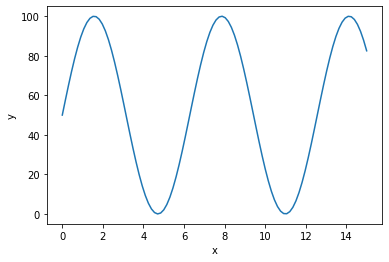

In [19]:
# UFRPE - Licrenciatura em Computação
# Programação 1 (LC2)
# AG-Ver7.1 (gráfico da função Aptidão)
import numpy as np
import random as rd
import matplotlib.pyplot as plt
x=np.linspace(0,15,100)
y=abs((np.sin(x) + 1) * 50)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show ()
exit

### Gráfico da Probabilidade Individual


[2.31713541e+01 4.89672465e-04 9.20735492e+01 5.70560004e+01
 3.60292251e+01 1.21598752e+01 2.27989445e+01 2.27989445e+01
 7.10083518e+01 5.70560004e+01] valores da Aptidão dos individuos
[12. 11.  1.  3.  6.  4. 10. 10. 13.  3.] individuos
394.15273489587696 Valor das Aptidões


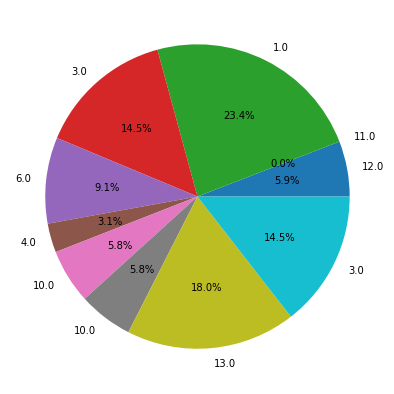

In [20]:
# UFRPE - Licrenciatura em Computação
# Programação 1 (LC2)
# AG-Ver7.2 - Gráfico da Probabilidade Individual
import numpy as np
import random as rd
import matplotlib.pyplot as plt


tamCromossomo = 4
pc = 0.95  # padrão
pm = 0.1  # padrão
numgeracoes = 20
tamPopulacao = 10

# População Inicial - Gerada de forma aleatória:
p = np.zeros((tamPopulacao, tamCromossomo))  # o numpy cria uma matriz com zeros, as linhas são tamPopulação e
# as colunas são tamCromossomos
# print (p)
for i in range(tamPopulacao):  # pecorrer as linhas da matriz
    for j in range(tamCromossomo):  # pecorre as coluna da matriz
        a = rd.uniform(0, 1)  # sortear um numero entre o e 1
        if (a >= 0.5):  # condição de a
            p[i][j] = 1  # define 1 para o gene (i-ésimo, j-ésimo)
        else:
            p[i][j] = 0  # define 0 para o gene
# print(p)
# Variaveis do AG
ind = np.zeros(tamCromossomo)  # temporaria - recebe os genes
individuo = np.zeros(tamPopulacao)  # armazena o valor convertido do binario
Aptidao = np.zeros(tamPopulacao) # armazena aptidoes de todos os individuos
novageracao = np.zeros((tamPopulacao, tamCromossomo))
# Iniciando o AG

for i in range(tamPopulacao):
    ind[:] = p[i, :]  # ind recebe todos os genes
    conv = 0            
    for j in range(tamCromossomo):
        conv = conv + ind[j] * (2 ** (tamCromossomo - (j + 1)))
    individuo[i] = conv  #####
        
# Calculo da Aptidão
TotalAptidao = 0
for i in range(tamPopulacao):
    Aptidao[i] = abs((np.sin(individuo[i]) + 1) * 50)
            # função seno
    TotalAptidao = Aptidao[i] + TotalAptidao        
# verificar probabilidade de cada individuo
# print (TotalAptidao)
pic = np.zeros(tamPopulacao)
pitotal = np.zeros(tamPopulacao)
pic = (1 / TotalAptidao) * Aptidao
# print (pic)
# print (pitotal)
print(Aptidao, 'valores da Aptidão dos individuos')    
print(individuo, 'individuos')
print(TotalAptidao, 'Valor das Aptidões')
plt.rcParams.update({'font.size':10})#define tamanho da fonte
Prob=individuo
Vperc=pic
plt.figure(figsize=(7,7))
plt.pie(x=Vperc, labels=Prob, autopct='%1.1f%%')
plt.show ()


### Fluxograma de Algoritmo Genético


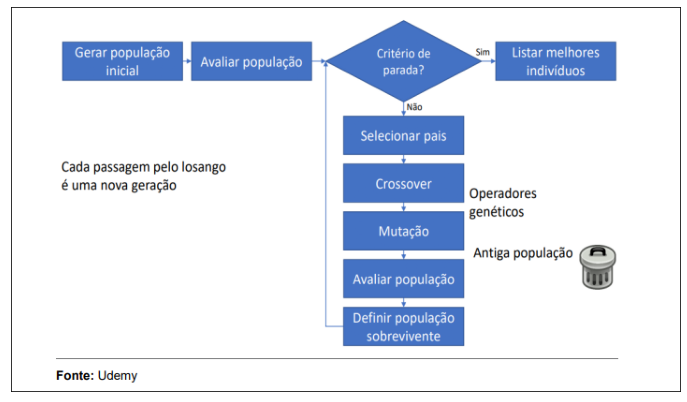

In [ ]:
# UFRPE - Licrenciatura em Computação
# Programação 1 (LC2)
# AG-Ver7.3 - Figura de um AG básico
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage.io import imread, imshow
img = plt.imread('/content/ag_fig7.PNG')
plt.figure(figsize=(12,8))
plt.xticks([],[])
plt.yticks([],[])
plt.imshow(img)

### Relatório do Projeto AG


Wellington Luis da Cunha
Julho de 2021

1-	Introdução
O seguinte relatório do projeto de Algoritmo Genético da Disciplina Programação1-LC2 (Python), tem como objetivo descrever os métodos seguidos para elaboração da codificação do projeto de AG realizada na linguagem Python. Inicialmente foi realizada pesquisa o sobre Algoritmo Genético e suas aplicações e importância na Computação.. É importante salientar que no exercício e construção do código, contemplou-se parte dos assuntos abordados na sala virtual das aulas. Como o Algoritmo Genético em sua essência de logica computacional é iterativo, isso de certa forma conduziu as possibilidades funcionais para programar o código. Estrutura de repetição, listas, matriz e cálculos de probabilidades junto com uma função matemática foram utilizadas. A função seno foi utilizada para caracterizar a função de aptidão dos indivíduos da população e para poder realizar uma visualização gráfica do funcionamento do Algoritmo Genético. Foi utilizada a biblioteca Matplotlib e a biblioteca Scikit-image, essas biblioteca enriqueceram o código com gráficos e visualização das probabilidades. Foi utilizado o ambiente do Pycharm inicialmente para confecção do código e posteriormente o Google Colaboratory para locação e execução do código.


2-	Desenvolvimento do Projeto AG.
Pesquisas na internet e leitura de artigos sedimentaram o corpo de conhecimento sobre o objeto do projeto e serviu de base para a lógica de programação do AG. Os algoritmos genéticos (AGs) foram propostos por Holland e seus alunos na década de 1970. Holland estudou a evolução natural considerando esta um processo robusto, simples e poderoso, que poderia ser adaptado para obtenção de soluções computacionais eficientespara problemas de otimização. O conceito de robustez relaciona-se ao fato de os AGs, independentemente das escolha dos parâmetros iniciais, em geral, produzirem soluções de qualidade [Dav89] [Dav02]. O principal diferencial dos AGs é a criação de descendente pelo operador de recombinação [K.A]. Além disso, a utilização de operadores de mutação e recombinação equilibra dois objetivos aparentemente conflitantes: o aproveitamento das melhores soluções e a exploração do espaço de busca. O processo de busca é, portanto, multidimensional, preservando soluções candidadas e provocando a troca de informação entre as soluções exploradas [Z.]; [Fer00]. A seguir, mostram-se os principais passos de um AG, baseando-se em [Z.]; 
• Durante a iteração gen, um AG mantém uma população de soluções potenciais P(gen) = xgen 1 , . . . , xgen n ; 
• Cada indivíduo xgen i é avaliado produzindo uma medida de aptidão, ou fitness; 
• Cada indivíduo xgen i é avaliado produzindo uma medida de aptidão, ou fitness; 
• Novos indivíduos são gerados a partir de (micro) indivíduos da população atual, os quais são selecionados para reprodução por um processo que tende a escolher indivíduos de maior fitnes; 
• Alguns indivíduos sofrem alterações, por meio de recombinação e mutação, formando novas soluções potenciais; 
• Dentre as soluções antigas e novas (micro + ¸), são selecionados indivíduos (sobreviventes) para a próxima geração (gen + 1); 
• Este processo é repetido até que uma condição de parada (cond?) seja satisfeita. Essa condição pode ser um nível esperado de adequação das soluções ou um número máximo de iterações.


3-	Conclusão e considerações finais
• Foi desenvolvido um Algoritmo Genético simples de modo roleta.
• São Algoritmos Bioinspirados (Teoria da Evolução – Genética ) e tem o intuito de resolver problemas cujo espaço de busca é do tipo NP-Completo. 
• A idéia é que a evolução dos indivíduos conduza a uma solução para o problema, próxima da melhor possível.


4-	Referências
[Dav89] GOLDBERG, David. E. Genetic algorithms in search, optimization, and machine learning. Addison. Reading, 1989. 
[Dav02] GOLDBERG, David. E. et. al. The design of innovation: Lessons from and for Competent Genetic Algorithmsby David E. Goldberg. Springer Science & Business Media, 2002. 
[K.A] DE JONG, K.A. Evolutionary Computation: A Unified Approach, ser. 2006. 
 [Z.] MICHALEWICZ, Z. Genetic Algorithms+ Data Structures= Evolution Programs, 3rd edn.© Springer. 1996.
 

